In [26]:
import numpy as np
#import pickle
import pickle5 as pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [27]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [28]:
def variance_of_ratio(x, y):
    
    def _get_covariance(x, y):
        # in theory, this should be the same as
        # np.diag(np.cov(dif.T, nom.T, rowvar=True)[x.shape[1]:, :x.shape[1]])
        cov = []
        for d in range(x.shape[1]):
            cov_xy = np.cov(np.array([x[:, d], y[:, d]]), bias=True)
            assert cov_xy.shape == (2,2)
            cov.append(cov_xy[0,1])
        return cov
        

    n = x.shape[0]
    var_x = np.var(x, axis=0)
    mean_x = np.mean(x, axis=0)
    var_y = np.var(y, axis=0)
    mean_y = np.mean(y, axis=0)
    
    cov_xy = _get_covariance(x, y)
    term1 = var_x / np.power(mean_y, 2)
    term2 = np.power(mean_x, 2) * var_y / np.power(mean_y, 4)
    term3 = 2 * mean_x * cov_xy / np.power(mean_y, 3)
    
    return 1/n*(term1 + term2 - term3)

In [29]:
dataset = 'mnist'
model_size = 'mnist'

with open('results/'+dataset+'/random-'+model_size+'.pickle', 'rb') as handle:
    random = pickle.load(handle)

with open('results/'+dataset+'/bald-'+model_size+'.pickle', 'rb') as handle:
    bald = pickle.load(handle)

with open('results/'+dataset+'/cbald-'+model_size+'.pickle', 'rb') as handle:
    cbald = pickle.load(handle)

with open('results/'+dataset+'/duobald-'+model_size+'.pickle', 'rb') as handle:
    duobald = pickle.load(handle)

with open('results/'+dataset+'/unc-' + model_size +'.pickle', 'rb') as handle:
    unc = pickle.load(handle)
    
best_performance = np.min(np.concatenate((random['model_perf'],
                                        unc['model_perf'],
                                        bald['model_perf'],
                                        cbald['model_perf'],
                                        duobald['model_perf'])))
best_performance = 0 if best_performance > 0 else best_performance

In [30]:
rand_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(random['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
unc_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(unc['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
cbald_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(cbald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
bald_perf = 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(bald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
duobald_perf= 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(duobald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))

rand_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, random['model_perf']-best_performance),axis=0)
unc_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, unc['model_perf']-best_performance),axis=0)
bald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, bald['model_perf']-best_performance),axis=0)
cbald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, cbald['model_perf']-best_performance),axis=0)
duobald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, duobald['model_perf']-best_performance),axis=0)
#print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))

print(dataset + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$ &  ${:,.2f} \pm  {:,.2f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc, duobald_perf,duobald_unc)) 

mnist & $0.00 \pm -0.00$ & $0.04 \pm 0.32$ &  $5.43 \pm 0.51$ & $16.34 \pm  0.50$ &  $19.40 \pm  0.70$  \\


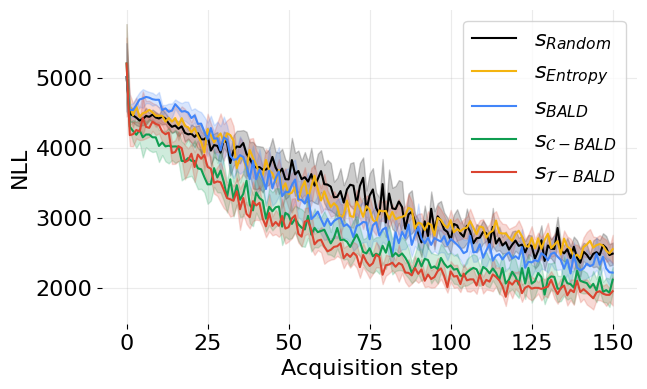

In [31]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['model_perf'],axis=0), label=r'$s_{Random}$', color='black')
plt.plot(np.mean(unc['model_perf'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['model_perf'],axis=0), label=r'$s_{BALD}$', color='#4285F9')
plt.plot(np.mean(cbald['model_perf'],axis=0),label=r'$s_{\mathcal{C}-BALD}$', color='#0F9D50')
plt.plot(np.mean(duobald['model_perf'],axis=0), label=r'$s_{\mathcal{T}-BALD}$', color='#DB4430')
#plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

plt.fill_between(np.arange(random['model_perf'].shape[-1]), y1 = np.mean(random['model_perf'], axis=0)-0.5*np.std(random['model_perf'], axis=0),
                                                    y2 = np.mean(random['model_perf'], axis=0)+0.5*np.std(random['model_perf'], axis=0),alpha=0.2, color='black')
plt.fill_between(np.arange(unc['model_perf'].shape[-1]), y1 = np.mean(unc['model_perf'], axis=0)-0.5*np.std(duobald['model_perf'], axis=0),
                                                    y2 = np.mean(unc['model_perf'], axis=0)+0.5*np.std(duobald['model_perf'], axis=0),alpha=0.2, color='#DB4430')
plt.fill_between(np.arange(bald['model_perf'].shape[-1]), y1 = np.mean(bald['model_perf'], axis=0)-0.5*np.std(bald['model_perf'], axis=0),
                                                    y2 = np.mean(bald['model_perf'], axis=0)+0.5*np.std(bald['model_perf'], axis=0),alpha=0.2, color='#4285F9')
plt.fill_between(np.arange(cbald['model_perf'].shape[-1]), y1 = np.mean(cbald['model_perf'], axis=0)-0.5*np.std(cbald['model_perf'], axis=0),
                                                    y2 = np.mean(cbald['model_perf'], axis=0)+0.5*np.std(cbald['model_perf'], axis=0),alpha=0.2, color='#0F9D50')
#plt.fill_between(np.arange(avg['model_perf'].shape[-1]), y1 = np.mean(avg['model_perf'], axis=0)-np.std(avg['model_perf'], axis=0),
#                                                    y2 = np.mean(avg['model_perf'], axis=0)+np.std(avg['model_perf'], axis=0),alpha=0.50)
#plt.fill_between(np.arange(classbald['model_perf'].shape[-1]), y1 = np.mean(classbald['model_perf'], axis=0)-np.std(cbald['model_perf'], axis=0),
#                                                    y2 = np.mean(classbald['model_perf'], axis=0)+np.std(classbald['model_perf'], axis=0),alpha=0.50)

plt.fill_between(np.arange(duobald['model_perf'].shape[-1]), y1 = np.mean(duobald['model_perf'], axis=0)-0.5*np.std(duobald['model_perf'], axis=0),
                                                    y2 = np.mean(duobald['model_perf'], axis=0)+0.5*np.std(duobald['model_perf'], axis=0),alpha=0.2, color='#DB4430')
#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel("NLL")
ax.grid(alpha=0.25)
ax.legend(loc='upper right')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig("MNIST.pdf")


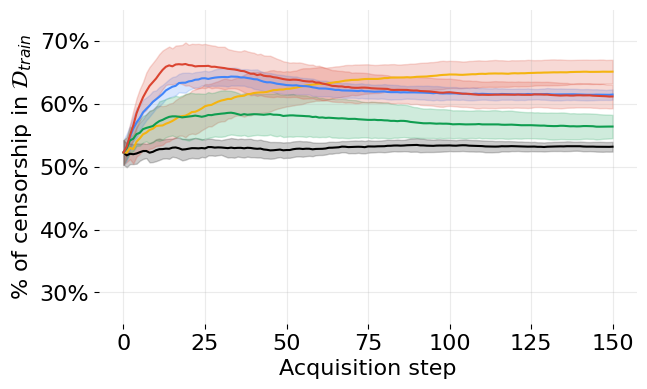

In [32]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['censored'],axis=0), label='Random', color='black')
plt.plot(np.mean(unc['censored'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['censored'],axis=0), label='Bald', color='#4285F9')
plt.plot(np.mean(cbald['censored'],axis=0),label=r'$\mathcal{C}$-Bald', color='#0F9D50')
plt.plot(np.mean(duobald['censored'],axis=0), label=r'$\mathcal{T}$-Bald', color='#DB4430')
#plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

plt.fill_between(np.arange(random['censored'].shape[-1]), y1 = np.mean(random['censored'], axis=0)-np.std(random['censored'], axis=0),
                                                    y2 = np.mean(random['censored'], axis=0)+np.std(random['censored'], axis=0),alpha=0.20, color='black')

plt.fill_between(np.arange(unc['censored'].shape[-1]), y1 = np.mean(unc['censored'], axis=0)-np.std(duobald['censored'], axis=0),
                                                    y2 = np.mean(unc['censored'], axis=0)+np.std(duobald['censored'], axis=0),alpha=0.2, color='#DB4430')

plt.fill_between(np.arange(bald['censored'].shape[-1]), y1 = np.mean(bald['censored'], axis=0)-np.std(bald['censored'], axis=0),
                                                    y2 = np.mean(bald['censored'], axis=0)+np.std(bald['censored'], axis=0),alpha=0.2, color='#4285F9')
plt.fill_between(np.arange(cbald['censored'].shape[-1]), y1 = np.mean(cbald['censored'], axis=0)-np.std(cbald['censored'], axis=0),
                                                    y2 = np.mean(cbald['censored'], axis=0)+np.std(cbald['censored'], axis=0),alpha=0.2, color='#0F9D50')

plt.fill_between(np.arange(duobald['censored'].shape[-1]), y1 = np.mean(duobald['censored'], axis=0)-np.std(duobald['censored'], axis=0),
                                                    y2 = np.mean(duobald['censored'], axis=0)+np.std(duobald['censored'], axis=0),alpha=0.2, color='#DB4430')
#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel(r'% of censorship in $\mathcal{D}_{train}$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.ylim(0.25, 0.75)
plt.grid(alpha=0.25)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
#ax.legend(loc='upper right')
plt.savefig("MNIST_censorship.pdf")
plt.show()

In [33]:
dataset = 'whas'
layers = [2, 3,4]
size = [64,128,256]
for l in layers:
    for s in size:
        with open('results/'+dataset+'/random-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            random = pickle.load(handle)

        with open('results/'+dataset+'/bald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            bald = pickle.load(handle)

        with open('results/'+dataset+'/cbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            cbald = pickle.load(handle)

        with open('results/'+dataset+'/duobald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            duobald = pickle.load(handle)
            
        with open('results/'+dataset+'/unc-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            unc = pickle.load(handle)

        #with open('results/'+dataset+'/classbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
        #    classbald = pickle.load(handle)
        #with open('results/'+dataset+'/gaussbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
        #    gaussbald = pickle.load(handle)

        best_performance = np.min(np.concatenate((random['model_perf'],
                                                bald['model_perf'],
                                                cbald['model_perf'],
                                                duobald['model_perf'],
                                                unc['model_perf'])))
        best_performance = 0 if best_performance > 0 else best_performance


        rand_perf= 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(random['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
        cbald_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(cbald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
        bald_perf = 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(bald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
        duobald_perf= 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(duobald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
        unc_perf= 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(unc['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
        
        rand_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, random['model_perf']-best_performance),axis=0)
        bald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, bald['model_perf']-best_performance),axis=0)
        cbald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, cbald['model_perf']-best_performance),axis=0)
        duobald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, duobald['model_perf']-best_performance),axis=0)
        unc_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, unc['model_perf']-best_performance),axis=0)
        #print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))
        print(dataset + " & " + str(s) + " & " + str(l) + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$ &  ${:,.2f} \pm  {:,.2f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc, duobald_perf,duobald_unc)) 

whas & 64 & 2 & $0.00 \pm -0.00$ & $-0.88 \pm 0.15$ &  $17.04 \pm 0.34$ & $15.21 \pm  0.39$ &  $24.64 \pm  0.60$  \\
whas & 128 & 2 & $0.00 \pm -0.00$ & $-0.74 \pm 0.17$ &  $15.83 \pm 0.36$ & $13.26 \pm  0.29$ &  $22.29 \pm  0.58$  \\
whas & 256 & 2 & $0.00 \pm -0.00$ & $0.34 \pm 0.19$ &  $6.88 \pm 0.16$ & $8.35 \pm  0.23$ &  $17.77 \pm  0.37$  \\
whas & 64 & 3 & $0.00 \pm -0.00$ & $-4.47 \pm 0.29$ &  $3.62 \pm 0.48$ & $8.96 \pm  0.60$ &  $13.53 \pm  0.79$  \\
whas & 128 & 3 & $0.00 \pm -0.00$ & $-3.84 \pm 0.31$ &  $10.04 \pm 0.58$ & $16.62 \pm  0.95$ &  $24.24 \pm  1.47$  \\
whas & 256 & 3 & $0.00 \pm -0.00$ & $-1.64 \pm 0.29$ &  $4.44 \pm 0.43$ & $18.39 \pm  0.77$ &  $22.26 \pm  1.07$  \\
whas & 64 & 4 & $0.00 \pm 0.00$ & $-9.15 \pm 0.29$ &  $-11.12 \pm 0.31$ & $-15.69 \pm  0.37$ &  $-23.44 \pm  0.26$  \\
whas & 128 & 4 & $0.00 \pm -0.00$ & $-0.65 \pm 0.74$ &  $0.77 \pm 0.76$ & $-7.07 \pm  0.99$ &  $-21.37 \pm  0.54$  \\
whas & 256 & 4 & $0.00 \pm -0.00$ & $0.04 \pm 0.60$ &  $-3.51 \

In [34]:
print(np.mean(random['model_perf'] > bald['model_perf']))
print(np.mean(random['model_perf'] > duobald['model_perf']))
print(np.mean(random['model_perf'] > cbald['model_perf']))

0.4598019801980198
0.5184158415841584
0.6071287128712871


In [35]:
dataset = 'synth'
model_size = 'synth'

with open('results/'+dataset+'/random-'+model_size+'.pickle', 'rb') as handle:
    random = pickle.load(handle)

with open('results/'+dataset+'/bald-'+model_size+'.pickle', 'rb') as handle:
    bald = pickle.load(handle)

with open('results/'+dataset+'/cbald-'+model_size+'.pickle', 'rb') as handle:
    cbald = pickle.load(handle)

with open('results/'+dataset+'/duobald-'+model_size+'.pickle', 'rb') as handle:
    duobald = pickle.load(handle)

with open('results/'+dataset+'/unc-' + model_size +'.pickle', 'rb') as handle:
    unc = pickle.load(handle)
    
    

In [36]:
best_performance = np.min(np.concatenate((random['model_perf'],
                                        bald['model_perf'],
                                        cbald['model_perf'],
                                        duobald['model_perf'])))
cbald_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(cbald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
bald_perf = 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(bald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
duobald_perf= 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(duobald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
rand_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, random['model_perf']-best_performance),axis=0)
bald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, bald['model_perf']-best_performance),axis=0)
cbald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, cbald['model_perf']-best_performance),axis=0)
duobald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, duobald['model_perf']-best_performance),axis=0)
#print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))

rand_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(random['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
unc_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(unc['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
cbald_perf =100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(cbald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
bald_perf = 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(bald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))
duobald_perf= 100*np.mean(((np.mean(random['model_perf'],axis=0)-best_performance)-(np.mean(duobald['model_perf'],axis=0)-best_performance))/(np.mean(random['model_perf'],axis=0)-best_performance))

rand_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, random['model_perf']-best_performance),axis=0)
unc_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, unc['model_perf']-best_performance),axis=0)
bald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, bald['model_perf']-best_performance),axis=0)
cbald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, cbald['model_perf']-best_performance),axis=0)
duobald_unc = 100*np.mean(variance_of_ratio(random['model_perf']-best_performance, duobald['model_perf']-best_performance),axis=0)
#print(dataset + " & " + model_size + "&" + "0.0" + " & "+  str(bald_perf)+" & "+  str(cbald_perf)+" & "+  str(duobald_perf))

print(dataset + " & " + "${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm {:,.2f}$ & ${:,.2f} \pm  {:,.2f}$ &  ${:,.2f} \pm  {:,.2f}$  \\\\".format(rand_perf, rand_unc, unc_perf, unc_unc, bald_perf, bald_unc,cbald_perf,cbald_unc, duobald_perf,duobald_unc)) 

#print(dataset + " & synth & - & " + "0.0 & ${:,.2f} \pm {:,.2f}$ &  ${:,.2f} \pm  {:,.2f}$ &  ${:,.2f} \pm  {:,.2f}$  \\\\".format(bald_perf, bald_unc, cbald_perf,cbald_unc, duobald_perf,duobald_unc)) 

synth & $0.00 \pm -0.00$ & $26.26 \pm 3.34$ &  $21.20 \pm 2.80$ & $18.02 \pm  2.95$ &  $53.12 \pm  5.51$  \\


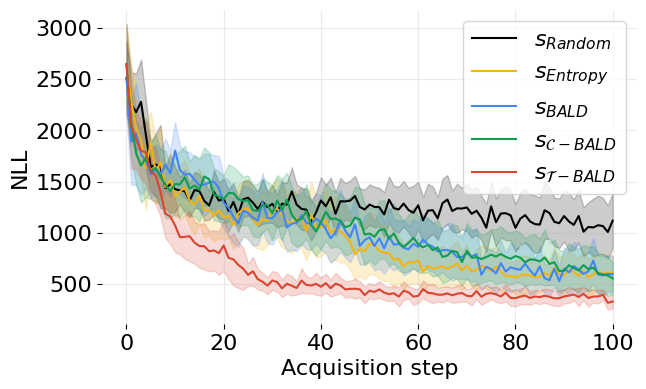

In [37]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['model_perf'],axis=0), label=r'$s_{Random}$', color='black')
plt.plot(np.mean(unc['model_perf'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['model_perf'],axis=0), label=r'$s_{BALD}$', color='#4285F9')
plt.plot(np.mean(cbald['model_perf'],axis=0),label=r'$s_{\mathcal{C}-BALD}$', color='#0F9D50')
plt.plot(np.mean(duobald['model_perf'],axis=0), label=r'$s_{\mathcal{T}-BALD}$', color='#DB4430')
#plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

plt.fill_between(np.arange(random['model_perf'].shape[-1]), y1 = np.mean(random['model_perf'], axis=0)-0.5*np.std(random['model_perf'], axis=0),
                                                    y2 = np.mean(random['model_perf'], axis=0)+0.5*np.std(random['model_perf'], axis=0),alpha=0.20, color='black')
plt.fill_between(np.arange(unc['model_perf'].shape[-1]), y1 = np.mean(unc['model_perf'], axis=0)-0.5*np.std(unc['model_perf'], axis=0),
                                                    y2 = np.mean(unc['model_perf'], axis=0)+0.5*np.std(unc['model_perf'], axis=0),alpha=0.2, color='#F4B410')

plt.fill_between(np.arange(bald['model_perf'].shape[-1]), y1 = np.mean(bald['model_perf'], axis=0)-0.5*np.std(bald['model_perf'], axis=0),
                                                    y2 = np.mean(bald['model_perf'], axis=0)+0.5*np.std(bald['model_perf'], axis=0),alpha=0.2, color='#4285F9')
plt.fill_between(np.arange(cbald['model_perf'].shape[-1]), y1 = np.mean(cbald['model_perf'], axis=0)-0.5*np.std(cbald['model_perf'], axis=0),
                                                    y2 = np.mean(cbald['model_perf'], axis=0)+0.5*np.std(cbald['model_perf'], axis=0),alpha=0.2, color='#0F9D50')
#plt.fill_between(np.arange(avg['model_perf'].shape[-1]), y1 = np.mean(avg['model_perf'], axis=0)-np.std(avg['model_perf'], axis=0),
#                                                    y2 = np.mean(avg['model_perf'], axis=0)+np.std(avg['model_perf'], axis=0),alpha=0.50)
#plt.fill_between(np.arange(classbald['model_perf'].shape[-1]), y1 = np.mean(classbald['model_perf'], axis=0)-np.std(cbald['model_perf'], axis=0),
#                                                    y2 = np.mean(classbald['model_perf'], axis=0)+np.std(classbald['model_perf'], axis=0),alpha=0.50)

plt.fill_between(np.arange(duobald['model_perf'].shape[-1]), y1 = np.mean(duobald['model_perf'], axis=0)-0.5*np.std(duobald['model_perf'], axis=0),
                                                    y2 = np.mean(duobald['model_perf'], axis=0)+0.5*np.std(duobald['model_perf'], axis=0),alpha=0.2, color='#DB4430')
#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel("NLL")
ax.grid(alpha=0.25)
ax.legend(loc='upper right')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig(dataset + "_performance.pdf")

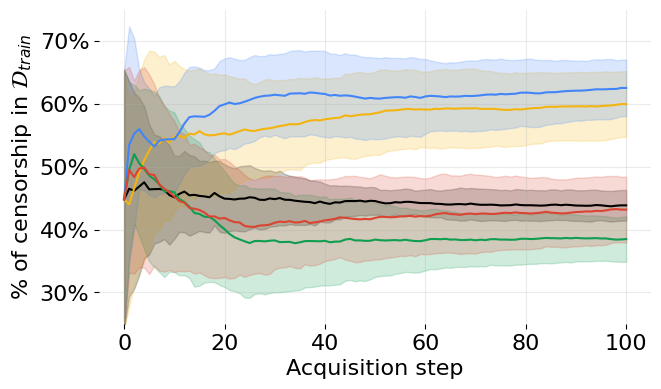

In [38]:
plt.style.use('default')
plt.rcParams.update({'font.size': 16})
width = 487.8225
fig, ax = plt.subplots(figsize=set_size(width,1), frameon=False)


plt.plot(np.mean(random['censored'],axis=0), label='Random', color='black')
plt.plot(np.mean(unc['censored'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
plt.plot(np.mean(bald['censored'],axis=0), label='Bald', color='#4285F9')
plt.plot(np.mean(cbald['censored'],axis=0),label=r'$\mathcal{C}$-Bald', color='#0F9D50')
plt.plot(np.mean(duobald['censored'],axis=0), label=r'$\mathcal{T}$-Bald', color='#DB4430')
#plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
#plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

plt.fill_between(np.arange(random['censored'].shape[-1]), y1 = np.mean(random['censored'], axis=0)-np.std(random['censored'], axis=0),
                                                    y2 = np.mean(random['censored'], axis=0)+np.std(random['censored'], axis=0),alpha=0.20, color='black')

plt.fill_between(np.arange(unc['censored'].shape[-1]), y1 = np.mean(unc['censored'], axis=0)-np.std(duobald['censored'], axis=0),
                                                    y2 = np.mean(unc['censored'], axis=0)+np.std(duobald['censored'], axis=0),alpha=0.2, color='#F4B410')

plt.fill_between(np.arange(bald['censored'].shape[-1]), y1 = np.mean(bald['censored'], axis=0)-np.std(bald['censored'], axis=0),
                                                    y2 = np.mean(bald['censored'], axis=0)+np.std(bald['censored'], axis=0),alpha=0.2, color='#4285F9')
plt.fill_between(np.arange(cbald['censored'].shape[-1]), y1 = np.mean(cbald['censored'], axis=0)-np.std(cbald['censored'], axis=0),
                                                    y2 = np.mean(cbald['censored'], axis=0)+np.std(cbald['censored'], axis=0),alpha=0.2, color='#0F9D50')

plt.fill_between(np.arange(duobald['censored'].shape[-1]), y1 = np.mean(duobald['censored'], axis=0)-np.std(duobald['censored'], axis=0),
                                                    y2 = np.mean(duobald['censored'], axis=0)+np.std(duobald['censored'], axis=0),alpha=0.2, color='#DB4430')
#plt.title("Synthetic 1D dataset")
plt.xlabel("Acquisition step")
plt.ylabel(r'% of censorship in $\mathcal{D}_{train}$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.ylim(0.25, 0.75)
plt.grid(alpha=0.25)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
#ax.legend(loc='upper right')
plt.savefig(dataset+"_censorship.pdf")
plt.show()
#plt.plot(np.mean(cbald_m['model_perf'],axis=0))

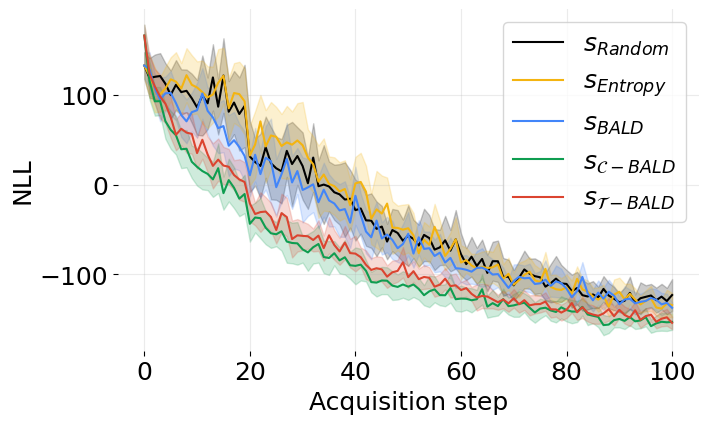

In [46]:
dataset = 'credit_risk'
layers = [3]
size = [128]
for l in layers:
    for s in size:
        with open('results/'+dataset+'/random-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            random = pickle.load(handle)

        with open('results/'+dataset+'/bald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            bald = pickle.load(handle)

        with open('results/'+dataset+'/cbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            cbald = pickle.load(handle)

        with open('results/'+dataset+'/duobald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            duobald = pickle.load(handle)
            
        with open('results/'+dataset+'/unc-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            unc = pickle.load(handle)

        #with open('results/'+dataset+'/classbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
        #    classbald = pickle.load(handle)
        #with open('results/'+dataset+'/gaussbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
        #    gaussbald = pickle.load(handle)


        plt.style.use('default')
        plt.rcParams.update({'font.size': 18})
        width = 487.8225
        fig, ax = plt.subplots(figsize=set_size(width*1.1,1), frameon=False)

        plt.plot(np.mean(random['model_perf'],axis=0), label=r'$s_{Random}$', color='black')
        plt.plot(np.mean(unc['model_perf'],axis=0), label=r'$s_{Entropy}$', color='#F4B410')
        plt.plot(np.mean(bald['model_perf'],axis=0), label=r'$s_{BALD}$', color='#4285F9')
        plt.plot(np.mean(cbald['model_perf'],axis=0),label=r'$s_{\mathcal{C}-BALD}$', color='#0F9D50')
        plt.plot(np.mean(duobald['model_perf'],axis=0), label=r'$s_{\mathcal{T}-BALD}$', color='#DB4430')
        #plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
        #plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
        #plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

        plt.fill_between(np.arange(random['model_perf'].shape[-1]), y1 = np.mean(random['model_perf'], axis=0)-0.5*np.std(random['model_perf'], axis=0),
                                                            y2 = np.mean(random['model_perf'], axis=0)+0.5*np.std(random['model_perf'], axis=0),alpha=0.20, color='black')
        plt.fill_between(np.arange(bald['model_perf'].shape[-1]), y1 = np.mean(bald['model_perf'], axis=0)-0.5*np.std(bald['model_perf'], axis=0),
                                                            y2 = np.mean(bald['model_perf'], axis=0)+0.5*np.std(bald['model_perf'], axis=0),alpha=0.2, color='#4285F9')
        plt.fill_between(np.arange(cbald['model_perf'].shape[-1]), y1 = np.mean(cbald['model_perf'], axis=0)-0.5*np.std(cbald['model_perf'], axis=0),
                                                            y2 = np.mean(cbald['model_perf'], axis=0)+0.5*np.std(cbald['model_perf'], axis=0),alpha=0.2, color='#0F9D50')
        plt.fill_between(np.arange(unc['model_perf'].shape[-1]), y1 = np.mean(unc['model_perf'], axis=0)-0.5*np.std(unc['model_perf'], axis=0),
                                                            y2 = np.mean(unc['model_perf'], axis=0)+0.5*np.std(unc['model_perf'], axis=0), alpha=0.20,color='#F4B410')
        #plt.fill_between(np.arange(classbald['model_perf'].shape[-1]), y1 = np.mean(classbald['model_perf'], axis=0)-np.std(cbald['model_perf'], axis=0),
        #                                                    y2 = np.mean(classbald['model_perf'], axis=0)+np.std(classbald['model_perf'], axis=0),alpha=0.50)

        plt.fill_between(np.arange(duobald['model_perf'].shape[-1]), y1 = np.mean(duobald['model_perf'], axis=0)-0.5*np.std(duobald['model_perf'], axis=0),
                                                            y2 = np.mean(duobald['model_perf'], axis=0)+0.5*np.std(duobald['model_perf'], axis=0),alpha=0.2, color='#DB4430')
        #plt.title(dataset)
        plt.xlabel("Acquisition step")
        plt.ylabel("NLL")
        ax.grid(alpha=0.25)
        ax.legend(loc='upper right')
        #ax.get_xaxis().set_visible(False)
        #ax.get_yaxis().set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.tight_layout()
        plt.savefig(dataset + "_performance.pdf")


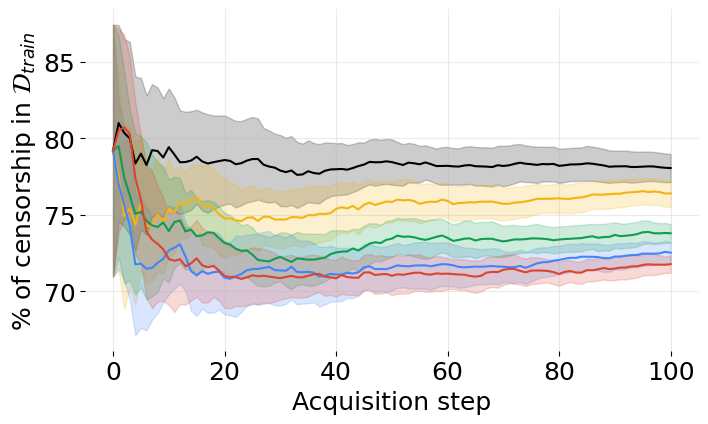

In [37]:
#dataset = 'IHC4'
layers = [3]
size = [128]
for l in layers:
    for s in size:
        with open('results/'+dataset+'/random-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            random = pickle.load(handle)

        with open('results/'+dataset+'/bald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            bald = pickle.load(handle)

        with open('results/'+dataset+'/cbald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            cbald = pickle.load(handle)

        with open('results/'+dataset+'/duobald-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            duobald = pickle.load(handle)

        with open('results/'+dataset+'/unc-'+str(s) + str(l) +'.pickle', 'rb') as handle:
            unc = pickle.load(handle)
            

        plt.style.use('default')
        plt.rcParams.update({'font.size': 18})
        width = 487.8225
        fig, ax = plt.subplots(figsize=set_size(width*1.1,1), frameon=False)


        plt.plot(100*np.mean(random['censored'],axis=0), label=r'$s_{Random}', color='black')
        plt.plot(100*np.mean(unc['censored'],axis=0), label=r'$s_{Unc}$', color='#F4B410')
        plt.plot(100*np.mean(bald['censored'],axis=0), label=r's_{Bald}', color='#4285F9')
        plt.plot(100*np.mean(cbald['censored'],axis=0),label=r'$\mathcal{C}$-Bald', color='#0F9D50')
        plt.plot(100*np.mean(duobald['censored'],axis=0), label=r'$\mathcal{T}$-Bald', color='#DB4430')
        #plt.plot(np.mean(gaussbald['model_perf'],axis=0),label='avg')
        #plt.plot(np.mean(avg['model_perf'],axis=0),label='avg')
        #plt.plot(np.mean(classbald['model_perf'],axis=0),label='class')

        plt.fill_between(np.arange(random['censored'].shape[-1]), y1 = 100*(np.mean(random['censored'], axis=0)-0.5*np.std(random['censored'], axis=0)),
                                                            y2 = 100*(np.mean(random['censored'], axis=0)+0.5*np.std(random['censored'], axis=0)),alpha=0.20, color='black')

        plt.fill_between(np.arange(unc['censored'].shape[-1]), y1 = 100*(np.mean(unc['censored'], axis=0)-0.5*np.std(unc['censored'], axis=0)),
                                                            y2 = 100*(np.mean(unc['censored'], axis=0)+0.5*np.std(unc['censored'], axis=0)), alpha=0.20,color='#F4B410')

        plt.fill_between(np.arange(bald['censored'].shape[-1]), y1 = 100*(np.mean(bald['censored'], axis=0)-0.5*np.std(bald['censored'], axis=0)),
                                                            y2 = 100*(np.mean(bald['censored'], axis=0)+0.5*np.std(bald['censored'], axis=0)),alpha=0.2, color='#4285F9')
        
        plt.fill_between(np.arange(cbald['censored'].shape[-1]), y1 = 100*(np.mean(cbald['censored'], axis=0)-0.5*np.std(cbald['censored'], axis=0)),
                                                            y2 = 100*(np.mean(cbald['censored'], axis=0)+0.5*np.std(cbald['censored'], axis=0)),alpha=0.2, color='#0F9D50')

        plt.fill_between(np.arange(duobald['censored'].shape[-1]), y1 = 100*(np.mean(duobald['censored'], axis=0)-0.5*np.std(duobald['censored'], axis=0)),
                                                            y2 = 100*(np.mean(duobald['censored'], axis=0)+0.5*np.std(duobald['censored'], axis=0)),alpha=0.2, color='#DB4430')
        #plt.title("Synthetic 1D dataset")
        plt.xlabel("Acquisition step")
        plt.ylabel(r'% of censorship in $\mathcal{D}_{train}$')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.grid(alpha=0.25)
        #ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        #ax.legend(loc='upper right')
        #plt.savefig("censorship.pdf")
        plt.tight_layout()
        plt.savefig(dataset + "censorship.pdf")